<a href="https://colab.research.google.com/github/Sewanmpm/IAAC2024_tutorials/blob/main/detectionclean.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install numpy pandas matplotlib seaborn opencv-python scikit-image tensorflow


In [2]:
import numpy as np


In [5]:
import cv2
from google.colab.patches import cv2_imshow

image1 = cv2.imread('/root/0013.jpg')
# cv2_imshow(image)


In [6]:
gray_image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
# cv2_imshow(gray_image)


In [7]:
blurred_image1 = cv2.GaussianBlur(gray_image1, (5, 5), 0)
# cv2_imshow(blurred_image)

In [8]:
_, binary_image1 = cv2.threshold(blurred_image1, 127, 255, cv2.THRESH_BINARY)

In [9]:
edges1 = cv2.Canny(binary_image1, 100, 200)

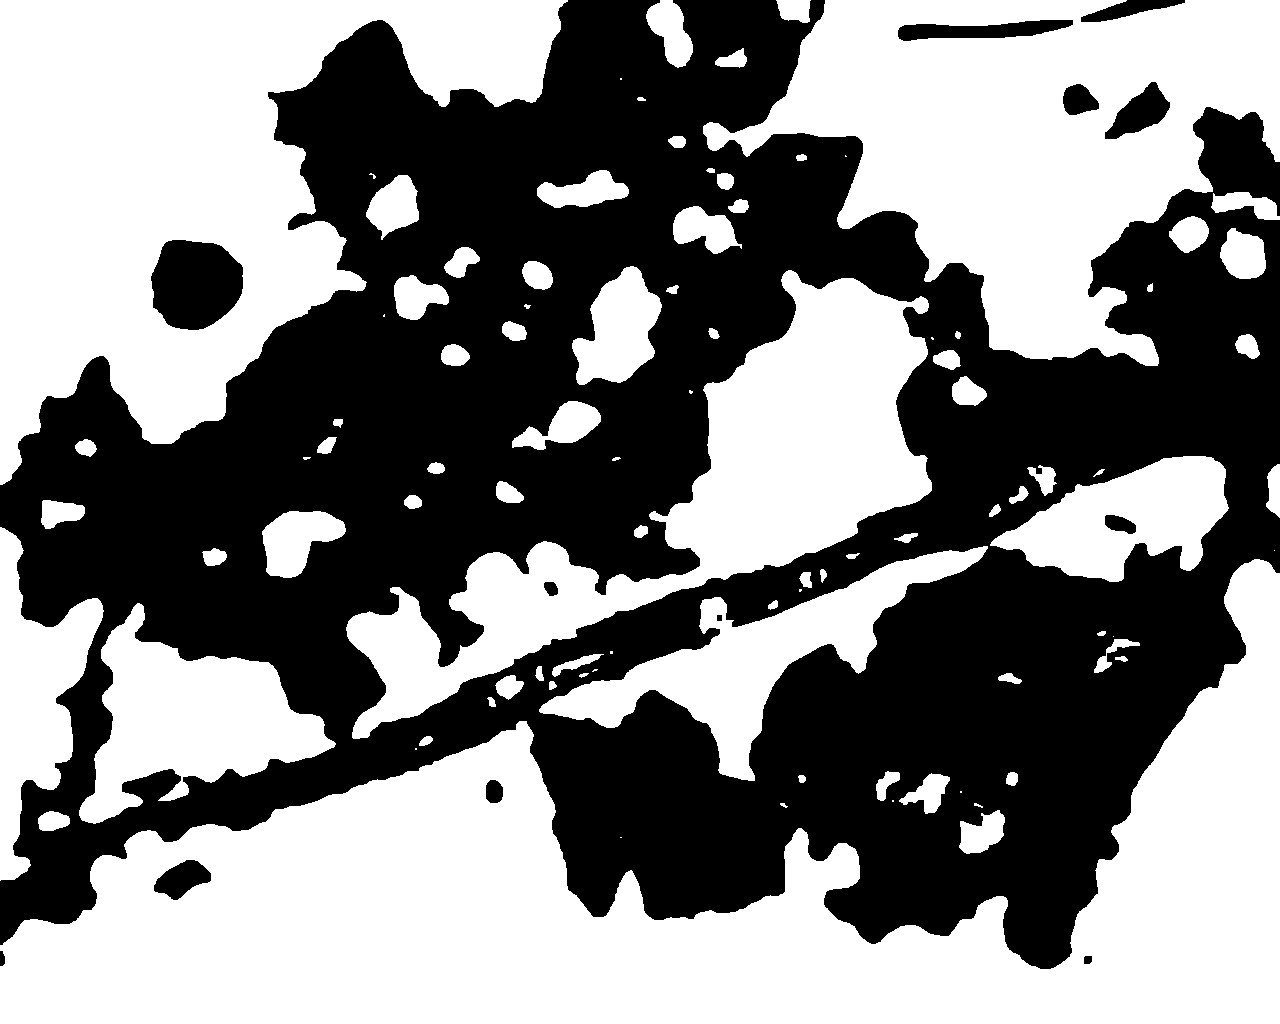

In [10]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Assuming 'binary_image' is already defined from previous steps:
kernel = np.ones((5, 5), np.uint8)
closing1 = cv2.morphologyEx(binary_image1, cv2.MORPH_CLOSE, kernel)
# Now display the result
cv2_imshow(closing1)

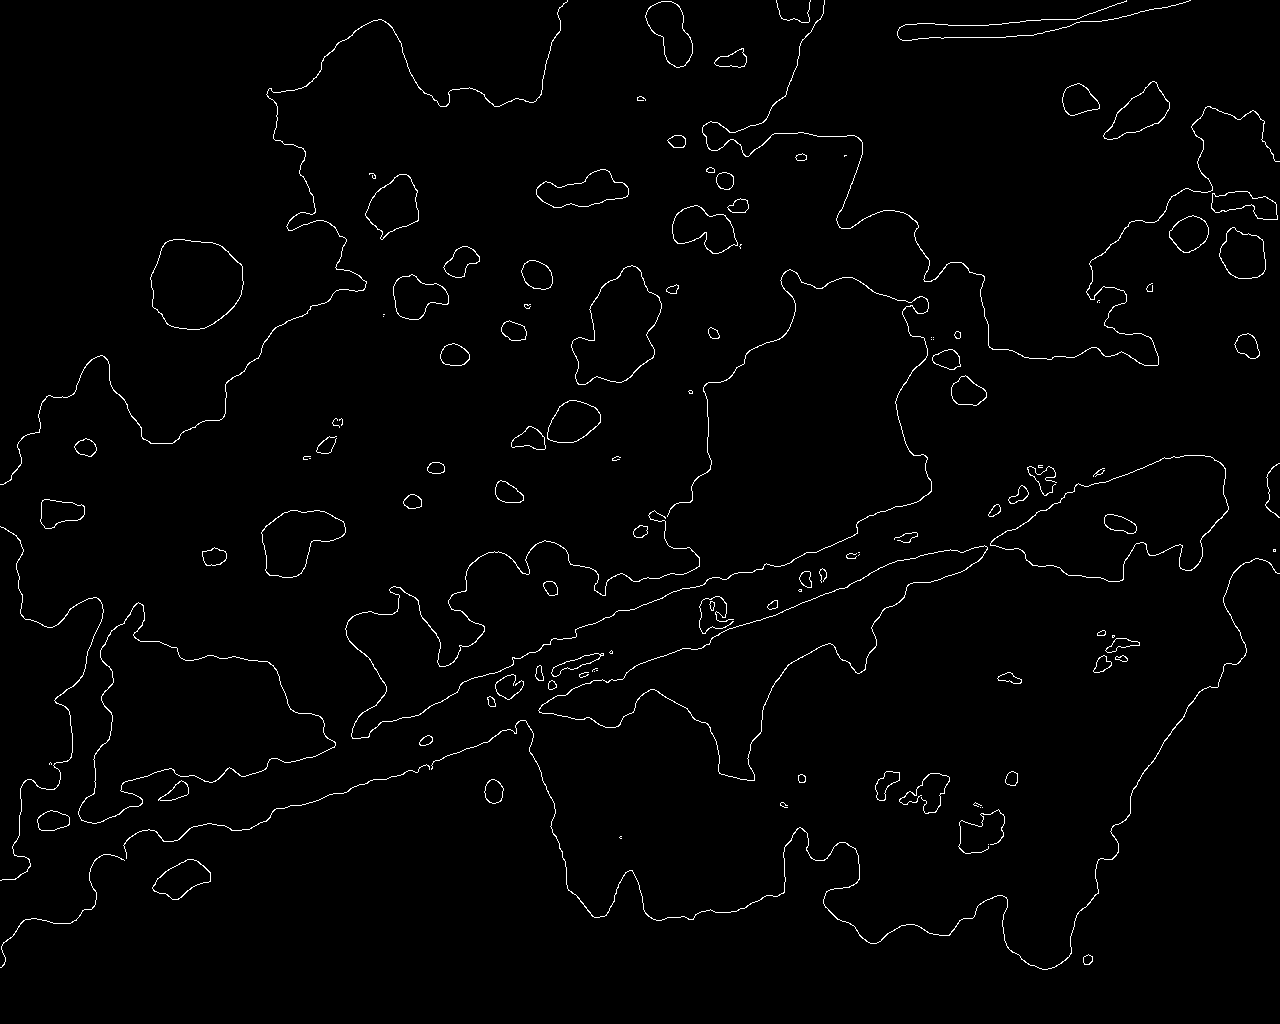

In [11]:
num_labels, labels_im1 = cv2.connectedComponents(closing1)
cv2_imshow(edges1)  # Display edges

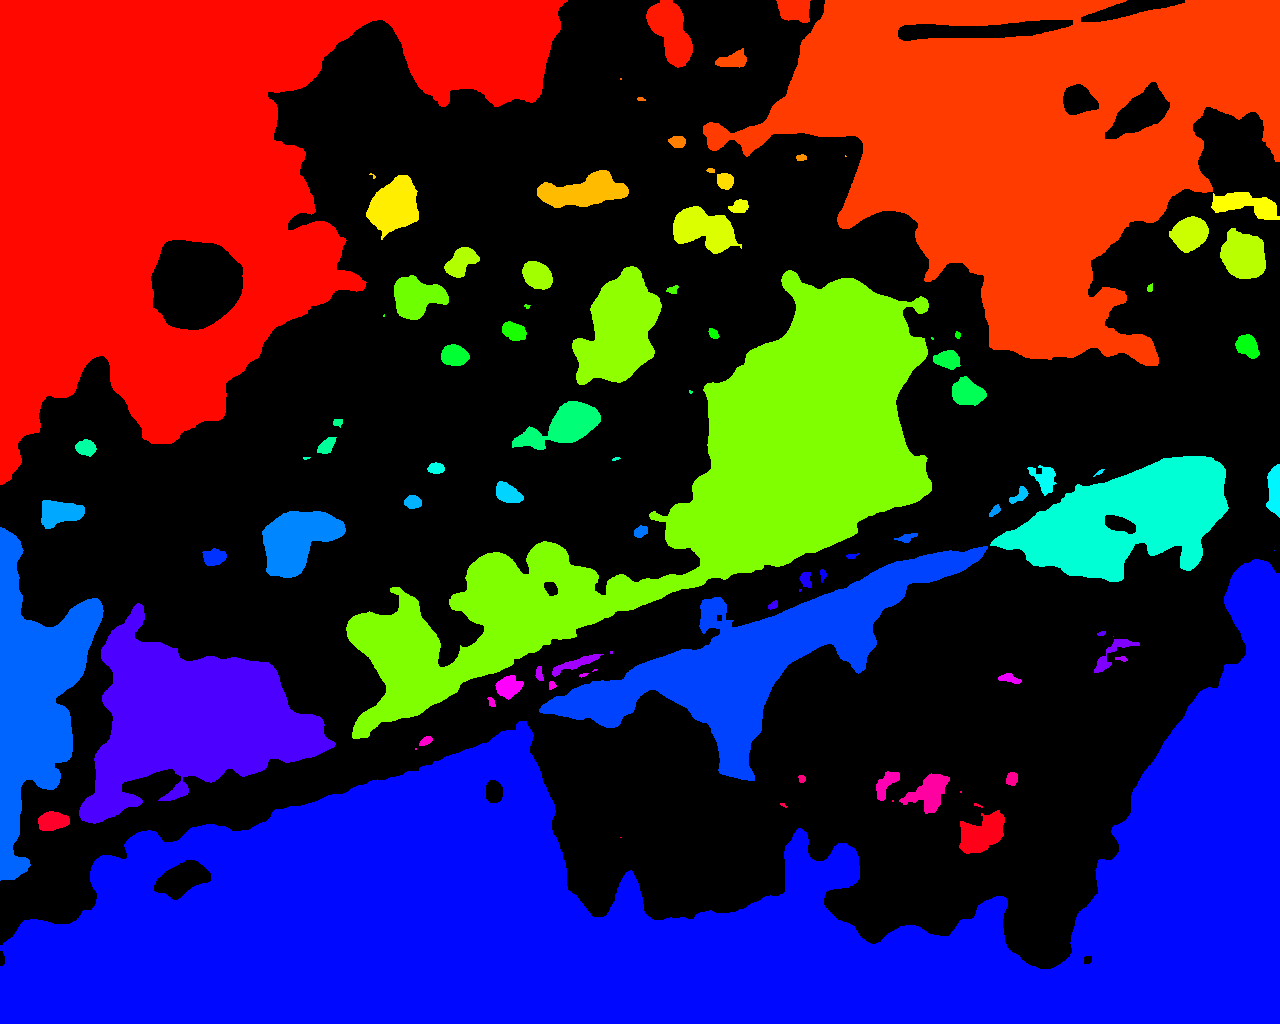

In [13]:
from google.colab.patches import cv2_imshow

# Display the result of connected components with modification for Google Colab
def imshow_components(labels):
    # Map component labels to hue val
    label_hue = np.uint8(179*labels/np.max(labels))
    blank_ch = 255*np.ones_like(label_hue)
    labeled_img = cv2.merge([label_hue, blank_ch, blank_ch])

    # cvt to BGR for display
    labeled_img = cv2.cvtColor(labeled_img, cv2.COLOR_HSV2BGR)

    # set bg label to black
    labeled_img[label_hue==0] = 0

    cv2_imshow(labeled_img)  # Use cv2_imshow instead of cv2.imshow

imshow_components(labels_im1)


In [14]:
num_components = num_labels - 1  # ignoring background
stats = np.zeros((num_components, 5))  # to store area, centroid, etc.

for i in range(1, num_labels):  # start from 1 to ignore the background
    component_mask = (labels_im1 == i).astype("uint8")  # isolate the component
    area = cv2.countNonZero(component_mask)
    M = cv2.moments(component_mask)
    centroid_x = int(M["m10"] / M["m00"])
    centroid_y = int(M["m01"] / M["m00"])
    stats[i - 1, :] = [area, centroid_x, centroid_y, 0, 0]  # store features, add more as needed

print(stats)


[[1.34846e+05 1.87000e+02 1.78000e+02 0.00000e+00 0.00000e+00]
 [1.88100e+03 6.70000e+02 3.10000e+01 0.00000e+00 0.00000e+00]
 [6.37000e+02 7.94000e+02 9.00000e+00 0.00000e+00 0.00000e+00]
 [1.09542e+05 1.02500e+03 1.38000e+02 0.00000e+00 0.00000e+00]
 [3.80000e+02 7.32000e+02 5.90000e+01 0.00000e+00 0.00000e+00]
 [4.00000e+00 6.20000e+02 7.80000e+01 0.00000e+00 0.00000e+00]
 [2.90000e+01 6.40000e+02 9.80000e+01 0.00000e+00 0.00000e+00]
 [1.71000e+02 6.77000e+02 1.41000e+02 0.00000e+00 0.00000e+00]
 [6.20000e+01 8.01000e+02 1.57000e+02 0.00000e+00 0.00000e+00]
 [3.00000e+00 8.45000e+02 1.55000e+02 0.00000e+00 0.00000e+00]
 [3.60000e+01 7.10000e+02 1.70000e+02 0.00000e+00 0.00000e+00]
 [2.04900e+03 5.83000e+02 1.91000e+02 0.00000e+00 0.00000e+00]
 [1.70000e+01 3.72000e+02 1.75000e+02 0.00000e+00 0.00000e+00]
 [2.39000e+02 7.24000e+02 1.80000e+02 0.00000e+00 0.00000e+00]
 [2.14500e+03 3.93000e+02 2.05000e+02 0.00000e+00 0.00000e+00]
 [1.11800e+03 1.24500e+03 2.04000e+02 0.00000e+00 0.000

In [16]:
# Example: Classifying based on area
def classify_based_on_area(stats, small_threshold, large_threshold):
    classifications = []
    for stat in stats:
        area = stat[0]  # Assuming the first column in stats is the area
        if area < small_threshold:
            classifications.append('Small')
        elif area > large_threshold:
            classifications.append('Large')
        else:
            classifications.append('Medium')
    return classifications

# Example thresholds
small_threshold = 50
large_threshold = 200
classifications = classify_based_on_area(stats, small_threshold, large_threshold)
print(classifications)


['Large', 'Large', 'Large', 'Large', 'Large', 'Small', 'Small', 'Medium', 'Medium', 'Small', 'Small', 'Large', 'Small', 'Large', 'Large', 'Large', 'Large', 'Large', 'Large', 'Large', 'Large', 'Large', 'Large', 'Large', 'Large', 'Small', 'Medium', 'Small', 'Small', 'Large', 'Medium', 'Small', 'Large', 'Small', 'Large', 'Large', 'Large', 'Small', 'Large', 'Medium', 'Large', 'Large', 'Small', 'Small', 'Large', 'Medium', 'Large', 'Large', 'Small', 'Large', 'Medium', 'Medium', 'Large', 'Medium', 'Large', 'Medium', 'Large', 'Medium', 'Large', 'Large', 'Small', 'Medium', 'Large', 'Medium', 'Medium', 'Small', 'Medium', 'Large', 'Small', 'Small', 'Large', 'Small', 'Large', 'Medium', 'Medium', 'Small', 'Small', 'Medium', 'Large', 'Medium', 'Medium', 'Medium', 'Small', 'Large', 'Large', 'Medium', 'Medium', 'Small', 'Small', 'Small', 'Small', 'Large', 'Large', 'Small']


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Example data
features = np.array([stat[:3] for stat in stats])  # Using the first three features: area, centroid_x, centroid_y
labels = np.random.choice(['Class1', 'Class2', 'Class3'], size=len(features))  # Replace with your actual labels

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)


In [18]:
# Initialize and train the classifier
classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(X_train, y_train)

# Predicting on the test set
y_pred = classifier.predict(X_test)

# Evaluating the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Displaying prediction examples
print("Predicted classes:", y_pred[:10])
print("Actual classes:", y_test[:10])


Accuracy: 0.47368421052631576
Predicted classes: ['Class2' 'Class3' 'Class2' 'Class1' 'Class1' 'Class1' 'Class1' 'Class1'
 'Class1' 'Class1']
Actual classes: ['Class2' 'Class3' 'Class2' 'Class3' 'Class3' 'Class1' 'Class3' 'Class3'
 'Class2' 'Class3']


In [19]:
import numpy as np

# Assuming 'stats' holds features, and 'classifications' from the previous classification task
# For simulation, let's say we are modeling the effect of temperature on cell survival rate.

def simulate_temperature_effect(classifications, initial_temp, final_temp, temp_step):
    results = []
    for temp in range(initial_temp, final_temp, temp_step):
        survival_rate = []
        for i, classification in enumerate(classifications):
            if classification == 'Class1':
                # Assume survival decreases with temperature for Class1
                survival = max(0, 100 - (temp - 20) * 0.5)  # Simplified model
            elif classification == 'Class2':
                # Assume survival increases to a point then decreases for Class2
                survival = max(0, 100 - abs(temp - 40) * 0.75)
            else:
                # Stable survival rate for Class3
                survival = 95
            survival_rate.append(survival)
        results.append((temp, np.mean(survival_rate)))
    return results

# Run the simulation
simulation_results = simulate_temperature_effect(classifications, 20, 50, 5)
print(simulation_results)


[(20, 95.0), (25, 95.0), (30, 95.0), (35, 95.0), (40, 95.0), (45, 95.0)]


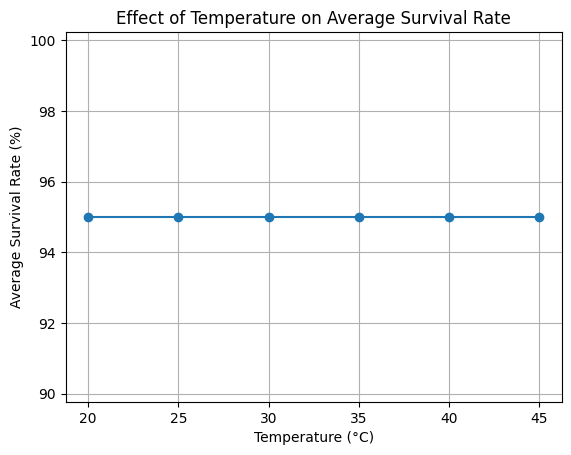

In [20]:
import matplotlib.pyplot as plt

# Plotting simulation results
temperatures = [result[0] for result in simulation_results]
survival_rates = [result[1] for result in simulation_results]

plt.plot(temperatures, survival_rates, marker='o')
plt.title('Effect of Temperature on Average Survival Rate')
plt.xlabel('Temperature (°C)')
plt.ylabel('Average Survival Rate (%)')
plt.grid(True)
plt.show()
